In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [2]:
%matplotlib widget

In [3]:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)[:, None]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.ones_like(u) * np.cos(v)

def dual(pole):
    phi = np.arctan2(np.hypot(pole[0], pole[1]), pole[2])
    psi = np.arctan2(pole[1], pole[0])

    my = np.array([
        [ np.cos(phi), 0, np.sin(phi)],
        [           0, 1,           0],
        [-np.sin(phi), 0, np.cos(phi)],
    ])
    
    mz = np.array([
        [np.cos(psi), -np.sin(psi), 0],
        [np.sin(psi),  np.cos(psi), 0],
        [          0,            0, 1],
    ])

    return (mz @ my) @ np.vstack([np.cos(u), np.sin(u), np.zeros_like(u)])

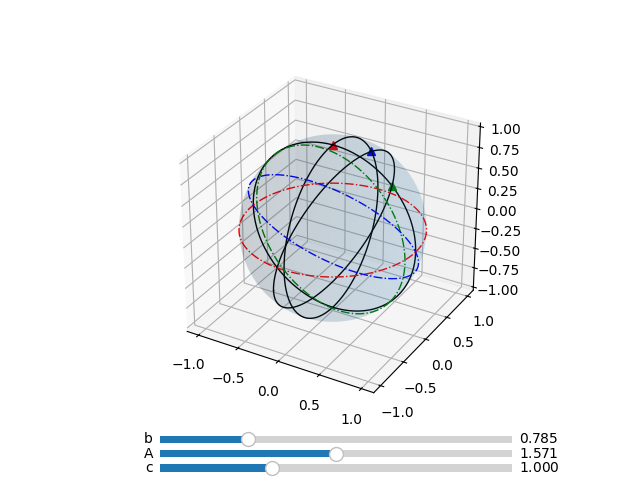

In [4]:
plt.close('all')

plot_dual = True

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, alpha=0.1)

ax.plot(0, 0, 1, 'r^')    # va and ab is a fixed point/line

lw = 1
ab = np.vstack([np.sin(u), np.zeros_like(u), np.cos(u)])
ax.plot(*ab, 'k-', lw=lw)

fig.subplots_adjust(bottom=0.15)
axt = fig.add_axes([0.25, 0.07, 0.55, 0.03])
axq = fig.add_axes([0.25, 0.04, 0.55, 0.03])
axc = fig.add_axes([0.25, 0.01, 0.55, 0.03])

t = np.pi/4
q = np.pi/2
c = 1

vb = np.array([np.sin(t), 0, np.cos(t)])
vc = np.array([np.cos(q)*np.sin(c), np.sin(q)*np.sin(c), np.cos(c)])
pb = ax.plot(*vb, 'g^')[0]
pc = ax.plot(*vc, 'b^')[0]

pac = ax.plot(*np.vstack([np.cos(q)*np.sin(u), np.sin(q)*np.sin(u), np.cos(u)]), 'k-', lw=lw)[0]
pbc = ax.plot(*dual(np.cross(vb, vc)), 'k-', lw=lw)[0]

if plot_dual:
    ax.plot(*dual([0, 0, 1]), 'r-.', lw=lw)
    pdb = ax.plot(*dual(vb), 'g-.', lw=lw)[0]
    pdc = ax.plot(*dual(vc), 'b-.', lw=lw)[0]

t_slider = Slider(
    ax=axt,
    label='b',
    valmin=0,
    valmax=np.pi,
    valinit=t,
)

q_slider = Slider(
    ax=axq,
    label='A',
    valmin=0,
    valmax=np.pi,
    valinit=q,
)

c_slider = Slider(
    ax=axc,
    label='c',
    valmin=0,
    valmax=np.pi,
    valinit=c,
)

def update(*arg, **kw):
    t = t_slider.val
    q = q_slider.val
    c = c_slider.val

    vb = np.array([np.sin(t), 0, np.cos(t)])
    vc = np.array([np.cos(q)*np.sin(c), np.sin(q)*np.sin(c), np.cos(c)])
    pb.set_data_3d([vb[0]], [vb[1]], [vb[2]])
    pc.set_data_3d([vc[0]], [vc[1]], [vc[2]])

    pac.set_data_3d(*np.vstack([np.cos(q)*np.sin(u), np.sin(q)*np.sin(u), np.cos(u)]))
    pbc.set_data_3d(*dual(np.cross(vb, vc)))
    
    if plot_dual:
        pdb.set_data_3d(*dual(vb))
        pdc.set_data_3d(*dual(vc))

    fig.canvas.draw_idle()

t_slider.on_changed(update)
q_slider.on_changed(update)
c_slider.on_changed(update)

ax.set_aspect('equal')